Saving cs448b_ipasn.csv to cs448b_ipasn.csv


Index(['date', 'l_ipn', 'r_asn', 'f'], dtype='object')


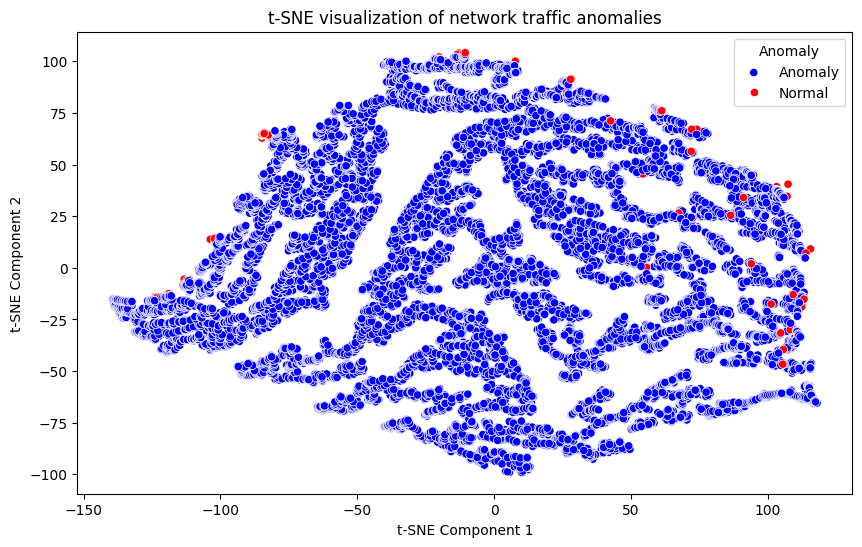

In [10]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('cs448b_ipasn.csv')

# Convert 'date' to datetime format and extract numerical features
data['date'] = pd.to_datetime(data['date'])

# Extract day of the year as a numerical feature from the date
data['day_of_year'] = data['date'].dt.dayofyear

# Select numerical features for analysis
features = data[['day_of_year', 'l_ipn', 'r_asn', 'f']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = iso_forest.fit_predict(scaled_features)

# Separate anomalies and normal data
anomalies = data[data['anomaly'] == -1]
normal = data[data['anomaly'] == 1]

# Apply PCA for initial dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(scaled_features)

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(pca_result)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=data['anomaly'], palette={-1: 'red', 1: 'blue'})
plt.title('t-SNE visualization of network traffic anomalies')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Anomaly', loc='best', labels=['Anomaly', 'Normal'])
plt.show()
